In [1]:
from transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
import numpy as np
import matplotlib.pyplot as plt
from config_ursse import get_from_config
import os
images_dir = os.path.join(get_from_config("URSSE_sync_motion_note_dir"),
                          "images")
import valstore as vt

In [2]:
wiggler = Wiggler(K_peak=get_from_config("K_peak"), N_periods=10)
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = int(512/4)
n_y = int(n_x/np.sqrt(2))
n_l = int(300/4)
l_min = 0.4
l_max = 1.4
x_step = x_max/(n_x-1/2)
y_step = y_max/(n_y-1/2)
l_step = (l_max-l_min)/(n_l-1)
mesh = (np.linspace(x_step/2, x_max, n_x),
        np.linspace(y_step/2, y_max, n_y),
        np.linspace(l_min, l_max, n_l))
spectral_transmission = transmission_function(mesh[2])
wr_sim0 = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=get_from_config("gamma"),
    harmonics=[1,2,3,4,5],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=False,  # if False, then both polarizations are calculated separately
    spectral_transmission=spectral_transmission
    )

In [3]:
vt.newval("semiApertureX", 1e3*x_max, "{:.1f}", "mrad",
          "analyzing_collected_data/radiation_spectrum/wigrad_spectrum_calculator.ipynb")
vt.newval("semiApertureY", 1e3*y_max, "{:.1f}", "mrad",
          "analyzing_collected_data/radiation_spectrum/wigrad_spectrum_calculator.ipynb")

In [4]:
wr_sim0.calc_photon_flux_on_meshgrid()

In [5]:
wr_sim0.extend_results_using_symmetries()

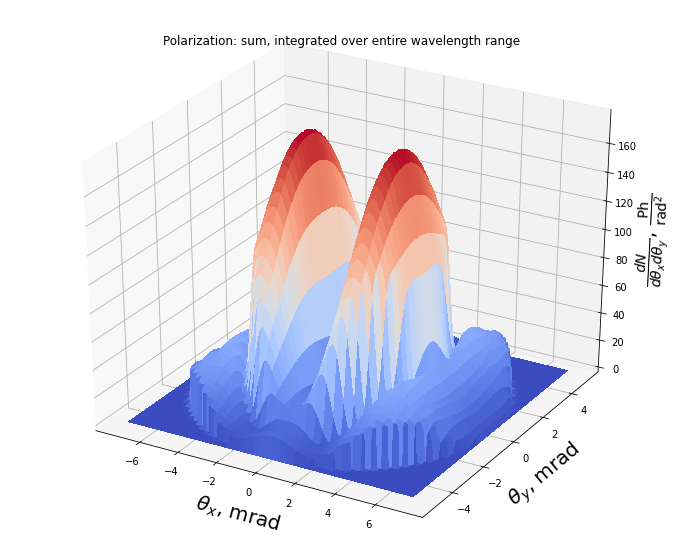

In [6]:
wr_sim0.show_angular_distribution()

In [7]:
# xs = wr_sim0.x_range
# ys = wr_sim0.y_range
# zs = wr_sim0.get_angular_distribution()
# import plotly.graph_objects as go
# fig = go.Figure(data=[go.Surface(z=zs, x=xs, y=ys)])
# fig.update_layout(title='', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90),
#                   scene=dict(aspectratio=dict(x=1, y=1, z=1)))
# fig.show()

In [8]:
wr_sim0.get_total_photon_flux()*7.5e6

45538.726729651265

In [9]:
x_peak = 0.16  # mm
rate_center = 933  # Hz
spad_rad = 0.09 # mm
x_angle_peak = 0.002362129  # rad
spad_rad_angle = x_angle_peak/x_peak*spad_rad
np.sum(wr_sim0.get_angular_distribution()[(wr_sim0.x_2D**2+wr_sim0.y_2D**2) < spad_rad_angle**2])\
    *wr_sim0.x_step*wr_sim0.y_step*2*7.5e6

2817.93618403848

# Calculation of number of emitted photons:

In [10]:
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=get_from_config("gamma"),
    harmonics=[1,2,3,4,5],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=False,  # if False, then both polarizations are calculated separately
    spectral_transmission=None
    )
wr_sim.calc_photon_flux_on_meshgrid()
wr_sim.extend_results_using_symmetries()

# Summary:

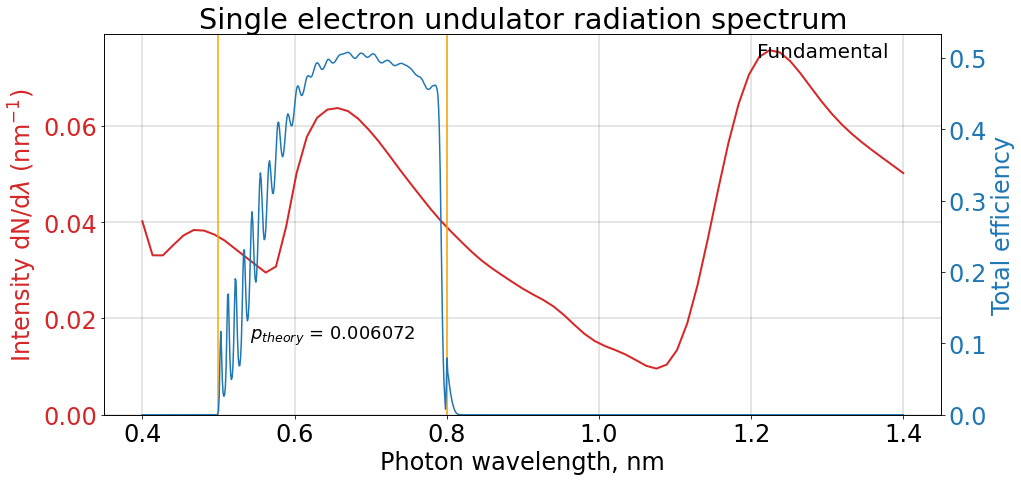

In [11]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
plt.rcParams.update({'font.size': 24,'legend.fontsize':24})
fig,ax = plt.subplots(figsize=[15,7])
ax.set_xlabel('Photon wavelength, nm')
plt.title('Single electron undulator radiation spectrum')
color = 'tab:red'
ax.plot(wr_sim.lambda_range, wr_sim.get_spectral_distribution(), linewidth=2, color = color)
ax.set_ylabel(r'Intensity dN/d$\lambda$ (nm$^{-1}$)', color=color)
plt.tick_params(axis ='y',labelcolor=color) 
ax.grid(color='k', linestyle='-', linewidth=2, alpha=0.1)
l_min = 0.5
l_max = 0.8
plt.axvline(l_min,color='orange')
plt.axvline(l_max,color='orange')
plt.annotate(r'$p_{theory}$ = '+'{:.6f}'.format(wr_sim0.get_total_photon_flux()),
             ((l_min+l_max)/2, 0.2*ax.get_ylim()[1]), ha='center', fontsize=18)
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel(r'Total efficiency', color=color)  # we already handled the x-label with ax1
l_tf = np.linspace(wr_sim.lambda_range[0], wr_sim.lambda_range[-1], 1000)
ax2.plot(l_tf, transmission_function(l_tf), color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax.set_ylim(0, ax.get_ylim()[1])
ax2.set_ylim(0, ax2.get_ylim()[1])
align_yaxis(ax, 0, ax2, 0)
plt.text(0.78,0.94,'Fundamental',fontsize=20,transform=ax.transAxes)
plt.show()

In [ ]:
0.006*

In [12]:
60/100e6

6e-07

In [13]:
5.109e-4/8.725e-5

5.8555873925501425

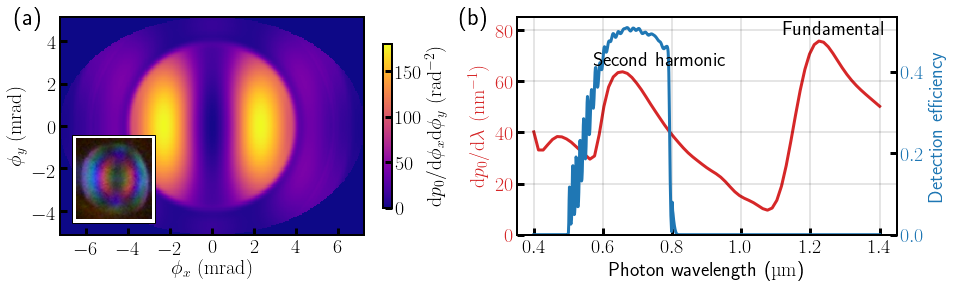

In [14]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("jinst"))

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.image as mpimg

plt.rc('text.latex', preamble=
       r'\usepackage{siunitx}'
      +r'\usepackage{physics}'
       +r'\usepackage{bm}'
      +r'\newcommand{\None}{p_{0}}')



fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
ax2 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1]) #, projection='3d')


ax1.set_xlabel(r'Photon wavelength (\SI{}{\micro m})')
color = 'tab:red'
ax1.plot(wr_sim.lambda_range, 1000*wr_sim.get_spectral_distribution(), color = color, zorder=-100)
ax1.set_ylabel(r'$\dv*{\None}{\lambda}$ $(\SI{}{nm^{-1}})$', color=color)
ax1.tick_params(axis ='y',labelcolor=color) 

l_min = 0.5
l_max = 0.8
# ax1.axvline(l_min,color='orange')
# ax1.axvline(l_max,color='orange')

ax1_ = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax1_.set_ylabel(r'Detection efficiency', color=color)  # we already handled the x-label with ax1
l_tf = np.linspace(wr_sim.lambda_range[0], wr_sim.lambda_range[-1], 1000)
ax1_.plot(l_tf, transmission_function(l_tf), color=color, zorder=-50)
ax1_.tick_params(axis='y', labelcolor=color)
# ax1_.annotate(r'$p_{\mathrm{theory}}$ = '+'{:.4f}'.format(wr_sim0.get_total_photon_flux()),
#              ((l_min+l_max)/2, 0.2*ax1_.get_ylim()[1]), ha='center', zorder=100)
ax1.grid(color='k', linestyle='-', linewidth=2, alpha=0.1)
ax1.set_ylim(0, 85)
ax1_.set_ylim(0, ax1_.get_ylim()[1])

ax1_.text(0.7,0.92,'Fundamental',transform=ax1.transAxes)
ax1_.text(0.2,0.78,'Second harmonic',transform=ax1.transAxes)





# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)
# surf = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# ax2.set_zlim(-1.01, 1.01)


# surf = ax2.plot_surface(1000*wr_sim0.x_2D,
#                        1000*wr_sim0.y_2D,
#                        wr_sim0.get_angular_distribution(),
#                        cmap=cm.coolwarm,
#                        linewidth=0,
#                        antialiased=False)
# labelpad = 20 
# ax2.set_xlabel(r'$\phi_x$ $(\SI{}{mrad})$', labelpad=labelpad)
# ax2.set_ylabel(r'$\phi_y$ $(\SI{}{mrad})$', labelpad=labelpad)
# ax2.set_zlabel(r"$\dd\None/\dd\phi_x\dd\phi_y$ $(\SI{}{rad^{-2}})$")

# plt.colorbar(surf, shrink=0.5, aspect=10, ax=ax2)

ang_dist = wr_sim0.get_angular_distribution()

pcm = ax2.pcolormesh(1000*wr_sim0.x_2D, 1000*wr_sim0.y_2D, ang_dist, cmap=cm.get_cmap('plasma'))
# asp = (ax2.get_ylim()[1]-ax2.get_ylim()[0])/(ax2.get_xlim()[1]-ax2.get_xlim()[0])
# ax2.set_aspect(1/np.sqrt(2)*1/asp)
ax2.set_xlabel(r'$\phi_x$ $(\SI{}{mrad})$')
ax2.set_ylabel(r'$\phi_y$ $(\SI{}{mrad})$')
ax2.set_yticks(ticks=np.arange(-4,6,2))
ax2.set_xticks(ticks=np.arange(-6,8,2))

cb = fig.colorbar(pcm, ax=ax2, shrink=0.75,
                  label=r"$\dd\None/\dd\phi_x\dd\phi_y$ $(\SI{}{rad^{-2}})$")


imagebox = OffsetImage(mpimg.imread('photo.png'), zoom=0.4)

ab = AnnotationBbox(imagebox, (-6.5, -4.4),
                   box_alignment=(0,0),
                   pad=0.2)

ax2.add_artist(ab)


for ax, lab in zip((ax2, ax1), ["(a)", "(b)"]):
    ax.text(-0.15, 1.05, lab, transform=ax.transAxes, va='top', ha='left',
           fontsize=24)
    
fig.savefig(os.path.join(images_dir,
                             "spectral_angular_properties.png"),
            dpi=300, bbox_inches='tight')

plt.show()

In [15]:
vt.newval("pTheor", wr_sim0.get_total_photon_flux(), "{:.2e}", "",
          "analyzing_collected_data/radiation_spectrum/wigrad_spectrum_calculator.ipynb")

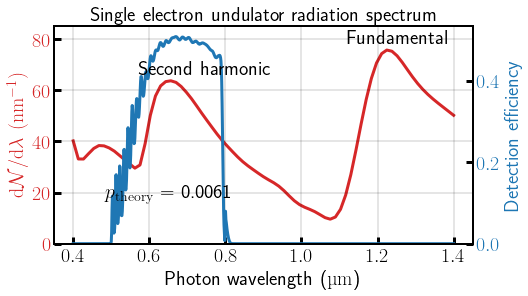

In [23]:
fig, ax1 = plt.subplots(figsize=(7.5,4))



ax1.set_xlabel(r'Photon wavelength (\SI{}{\micro m})')
color = 'tab:red'
ax1.plot(wr_sim.lambda_range, 1000*wr_sim.get_spectral_distribution(), color = color, zorder=-100)
ax1.set_ylabel(r'$\dv*{\mathcal{N}}{\lambda}$ $(\SI{}{nm^{-1}})$', color=color)
ax1.tick_params(axis ='y',labelcolor=color) 

l_min = 0.5
l_max = 0.8
# ax1.axvline(l_min,color='orange')
# ax1.axvline(l_max,color='orange')

ax1_ = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax1_.set_ylabel(r'Detection efficiency', color=color)  # we already handled the x-label with ax1
l_tf = np.linspace(wr_sim.lambda_range[0], wr_sim.lambda_range[-1], 1000)
ax1_.plot(l_tf, transmission_function(l_tf), color=color, zorder=-50)
ax1_.tick_params(axis='y', labelcolor=color)
p_th = wr_sim0.get_total_photon_flux()
ax1_.annotate(r'$p_{\mathrm{theory}}$ = '+'{:.4f}'.format(p_th),
             ((l_min+l_max)/2, 0.2*ax1_.get_ylim()[1]), ha='center', zorder=100)
ax1.grid(color='k', linestyle='-', linewidth=2, alpha=0.1)
ax1.set_ylim(0, 85)
ax1_.set_ylim(0, ax1_.get_ylim()[1])

ax1_.text(0.7,0.92,'Fundamental',transform=ax1.transAxes)
ax1_.text(0.2,0.78,'Second harmonic',transform=ax1.transAxes)
ax1.set_title("Single electron undulator radiation spectrum")

fig.savefig(os.path.join(images_dir,
                             "spectral_properties.png"),
            dpi=300, bbox_inches='tight')
plt.show()

In [21]:
p_th*7.5e6

45538.726729651265

In [2]:
f"{1e-9/1.6e-19:.2e}"

'6.25e+09'

In [3]:
1e-9/133e-9

0.007518796992481203

In [7]:
3.5e-3*133e-9

4.6550000000000005e-10